<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Perceptron_creating_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to predict the outputs from the following inputs. Can you identify the pattern?

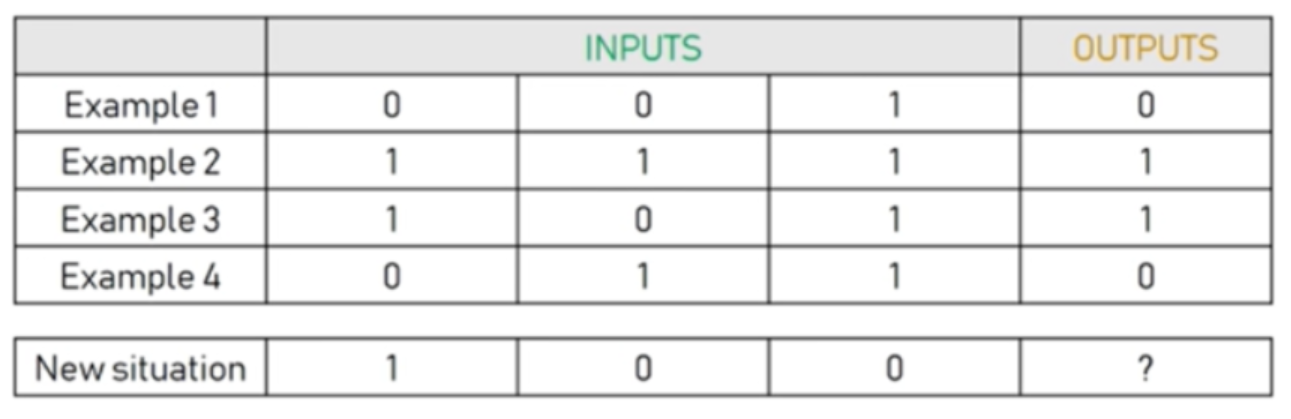

It's sometimes hard to identify the pattern while in the classroom, live as our thinking is very weak (we concentrate on listening and understanding, not on problem solving). But let's go through a common hypotheses:

It depends only on column 3 - that is wrong because for given intputs in column 3 (only 1's) we see that it can be 0 or 1. So if you see a 1 in column 3, you can't predict either 0 or 1.
It depends only on column 2 - also we can see that for any possible value in column 2 the output's can be 0 or 1. If you guessed the output only on the value of column 2 you would not predict the value correctly 50% of the time.
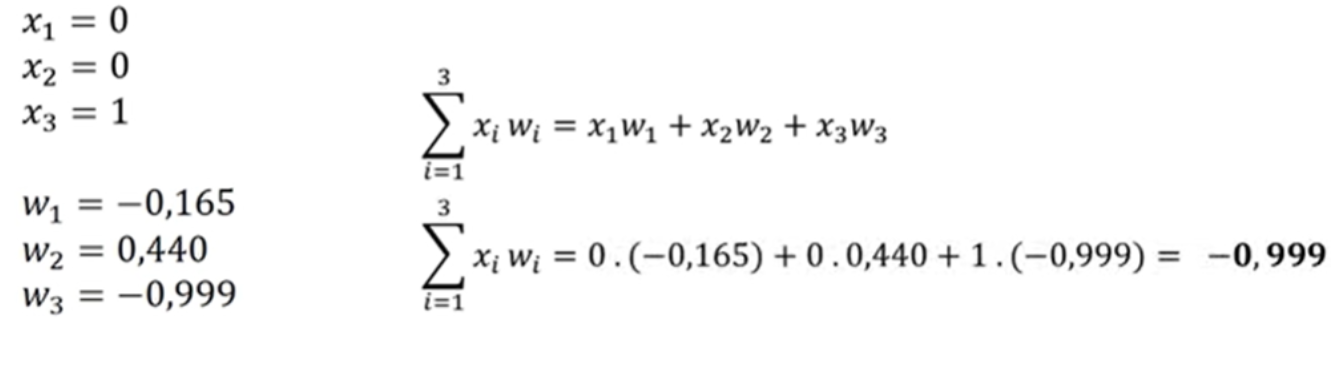

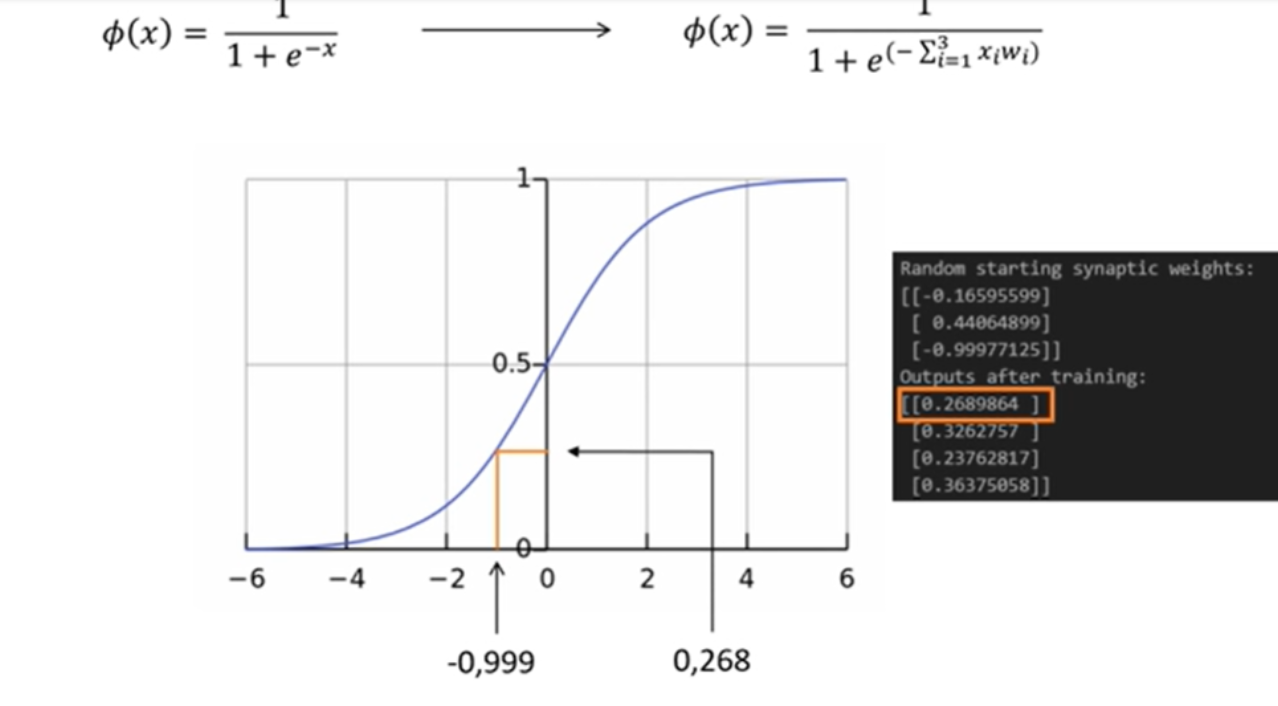

In [ ]:
import numpy as np

# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

# define training outputs
y_train = np.array([[0,1,1,0]]).T

# why do we need to transpose?
# ... later on we will calculate the error using 
# ... the error function: error = y_train - predictions
# ... that is why the form of "y_train" needs to match 
# ... the form of "predictions", so that subtraction would work

# initialize random seed for random number genration
# ... having the same seed will ensure that the random numbers
# ... generated are the same each run, but random with respect to one another
np.random.seed(1)

# random synaptic weights
# ... because we want them from -1 to 1 we do some transformations.
# ... The shape is 3 x 1 since we have 3 input neurons
# ... we have 3 input neurons because we have 3 input values
# ... and the shape of the input layer is the same as the number of inputs in most cases
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 # (-1, 1)

print("Weights of synapses")
print(weights_for_synapses)

Weights of synapses
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [ ]:
# helper functions
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

In [ ]:
for iteration in range(1):
   sum = np.dot(X_train, weights_for_synapses) 
   predictions = sigmoid(sum)

In [ ]:
# training loop - single forward pass / forward propogation
for iteration in range(1):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses))

In [ ]:
print(predictions) # Expected: [0,1,1,0]

[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.9393433500278241

In [ ]:
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])
y_train = np.array([[0,1,1,0]]).ravel()

clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [ ]:
# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

# define training outputs
y_train = np.array([[0,1,1,0]]).ravel()

clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.predict([[1, 0, 0]]))
print(clf.predict([[0, 1, 0]]))

1.0
[1]
[0]


### TRaining

In [ ]:
def sigm_derivative(x):
    return x * (1 - x)

In [ ]:
# training loop
for iteration in range(100):
    
   sum = np.dot(X_train, weights_for_synapses) # calculate the prediction (forward propagation) 
   predictions = sigmoid(sum)
   error = y_train - predictions # calculate the error
   adjustments = error * sigm_derivative(predictions) # backprop1 
   weights_for_synapses += np.dot(X_train.T, adjustments) # depending on training data
    
#     print(predictions, end="\n\n")
#     print(sigm_derivative(predictions), end="\n\n")
#     print(weights_for_synapses, end="\n\n")
#     weights_for_synapses += np.dot(X_train.T, adjustments) # backprop2 - adjustment
#     print(weights_for_synapses, end="\n\n")

In [ ]:
print("Weights of synapses")
print(weights_for_synapses)

Weights of synapses
[[-0.25430456]
 [ 4.68421103]
 [-2.09457888]]


In [ ]:
print(predictions) 

[[0.11021808]
 [0.91128881]
 [0.08762488]
 [0.92982111]]


In [ ]:
# training loop
for iteration in range(10000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
 #   weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions) # Expected: [0,1,1,0]

Weights of synapses
[[-0.25430456]
 [ 4.68421103]
 [-2.09457888]]
[[0.10962484]
 [0.9117609 ]
 [0.08715456]
 [0.93019133]]


In [ ]:
# initialize random weights
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 
# print(2 * np.random.random((3, 1)) - 1)

# training loop
for iteration in range(9000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    # weights_for_synapses += np.dot(X_train.T, adjustments)
    weights_for_synapses += np.dot(np.ones(4), adjustments) # uncomment this to stall the training
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions) # Expected: [0,1,1,0]

Weights of synapses
[[-1.02092309]
 [-0.37540151]
 [ 0.6981623 ]]
[[0.6677802 ]
 [0.3322198 ]
 [0.42000307]
 [0.57999693]]


### New dataset

In [ ]:
import numpy as np

# helper functions
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

def sigm_derivative(x):
    return x * (1 - x)

# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

# Old: y_train = np.array([[0,1,1,0]]).T 
# define training outputs
# now the pattern is based not on the first, but on the second collumn
y_train = np.array([[0,1,0,1]]).T

# random synaptic weights
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 

# training loop
for iteration in range(300):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions)

Weights of synapses
[[-0.2412531 ]
 [ 5.91081187]
 [-2.72234805]]
[[0.06178322]
 [0.95003877]
 [0.04918769]
 [0.96032611]]


In [ ]:
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

def sigm_derivative(x):
    return x * (1 - x)

# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

for iteration in range(3000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions)

Weights of synapses
[[-0.20376676]
 [13.04403023]
 [-6.31846679]]
[[0.00179946]
 [0.99853113]
 [0.00146823]
 [0.99880159]]


In [ ]:
X_train_new = np.array([[0,0,1]])
predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
print(predictions)

[[0.00179946]
 [0.99853114]
 [0.00146822]
 [0.99880159]]


### Other activation functions - TANH

In [ ]:
import numpy as np

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
    return 1-x**2

X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

y_train = np.array([[0,1,1,0]]).T
np.random.seed(5)
weights_for_synapses = 2 * np.random.random((3, 1)) - 1

print("Weights of synapses")
print(weights_for_synapses)

# training loop
for iteration in range(1000):
    predictions = tanh(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * tanh_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions) # [0,1,1,0]

Weights of synapses
[[-0.55601366]
 [ 0.74146461]
 [-0.58656169]]
Weights of synapses
[[3.02299361]
 [0.18321199]
 [0.32408374]]
[[-0.31294959]
 [ 0.98704509]
 [ 0.9909839 ]
 [-0.46684903]]


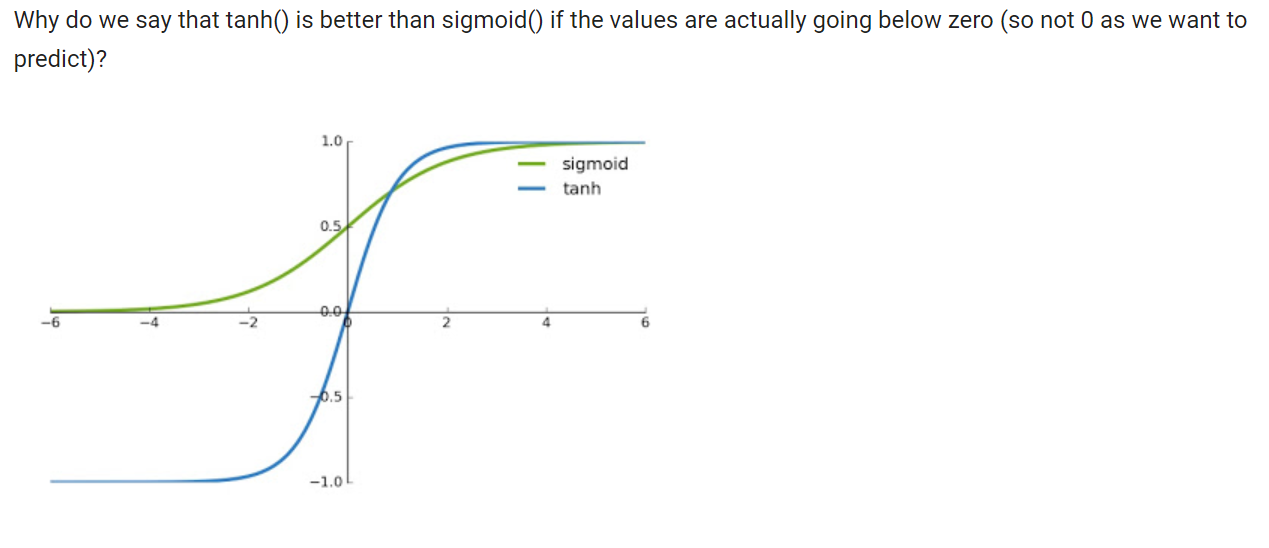